In [17]:
from tqdm.auto import tqdm

import cv2
from PIL import Image
from pytube import YouTube

import torch
import pandas as pd
from matplotlib import pyplot as plt
from facenet_pytorch import MTCNN

In [3]:
yt = YouTube("https://www.youtube.com/watch?v=Lo5nwRs8tRQ")
yt.streams.get_by_itag("244").download(
    output_path="data",
    filename="video_Lo5nwRs8tRQ.mp4"
)

'/home/dminn/Projects/MoistNet/data/video_Lo5nwRs8tRQ.mp4'

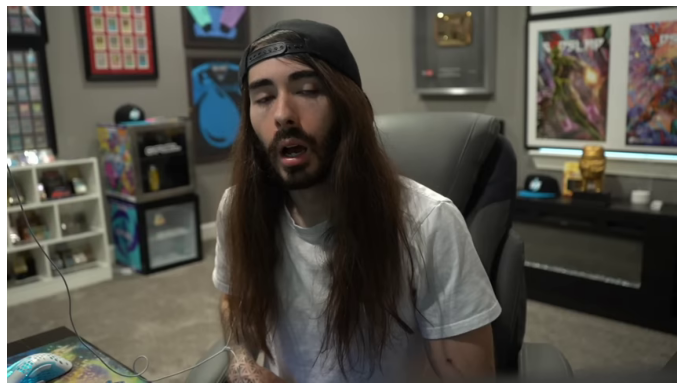

In [10]:
mtcnn = MTCNN(select_largest=False, device='cuda')

v_cap = cv2.VideoCapture("/home/dminn/Projects/MoistNet/data/video_Lo5nwRs8tRQ.mp4")
success, frame = v_cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame = Image.fromarray(frame)

plt.figure(figsize=(12, 8))
plt.imshow(frame)
plt.axis("off");

torch.Size([3, 160, 160])

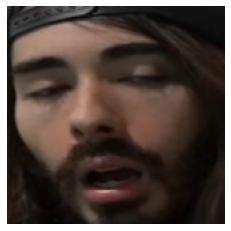

In [15]:
# Visualize
mtcnn = MTCNN(select_largest=False, post_process=False, device='cuda')
face = mtcnn(frame)
plt.imshow(face.permute(1, 2, 0).int().numpy())
plt.axis('off');
face.shape

In [19]:
mtcnn = MTCNN(margin=20, keep_all=True, post_process=False, device="cuda:0")

v_cap = cv2.VideoCapture("data/video_Lo5nwRs8tRQ.mp4")
v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT) / 1000) # debug 

frames = []
for i in tqdm(range(v_len)):
    v_cap.set(cv2.CAP_PROP_POS_MSEC, i*1000) # debug
    success, frame = v_cap.retrieve()
    
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(Image.fromarray(frame))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 33.12it/s]


In [38]:
frame_faces.shape

torch.Size([1, 3, 160, 160])

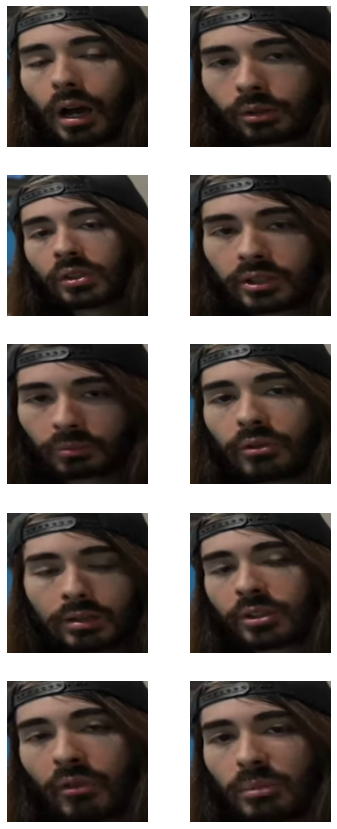

In [40]:
# faces = mtcnn(frames)

fig, axes = plt.subplots(5, 2, figsize=(6, 15))
for i, frame_faces in enumerate(faces):
    for face in frame_faces:
        axes[i//2, i%2].imshow(face.permute(1, 2, 0).int().numpy())
        axes[i//2, i%2].axis('off')
        
fig.show()